# Quenching Franction
---------------------------------------

In this notebook, we study the quenching fraction as a function of the infall time, pop. age and peculiar velocity.

In [1]:
from file_loc import FileLocs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

# Reading Initial Data

In [3]:
fl = FileLocs()
galaxy_file = fl.gal_fname1
# galaxy_file = '../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1'
cluster_file= fl.cls_fname

In [4]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groupCatalog_Yang_deCarvalho2017_galaxy_v1.csv



In [5]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [6]:
cat

Yang,RA,DEC,z,logM200,R200,N200
int64,float64,float64,float64,float64,float64,int64
2,240.5602,16.1113,0.036,15.29,2.01,525
4,247.1149,40.8317,0.03,14.66,1.24,217
5,247.1633,39.4674,0.03,14.81,1.4,277
6,167.6936,28.5374,0.033,14.6,1.18,167
7,351.1194,14.6251,0.042,14.51,1.1,106
8,239.5372,27.3133,0.09,15.1,1.71,183
9,241.5673,18.1483,0.038,14.48,1.08,143
10,223.2712,16.724,0.045,14.22,0.89,106
11,10.4693,-9.3997,0.056,14.96,1.55,156


# Mask Data
---------------------

In [7]:
mask = np.abs(gal0['vlosn'])<3.
mask&= gal0['ssfr']>-20
mask&= gal0['redshift']<0.085

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 14080
fraction: 0.43


In [8]:
gal = gal0[mask].copy()

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [9]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

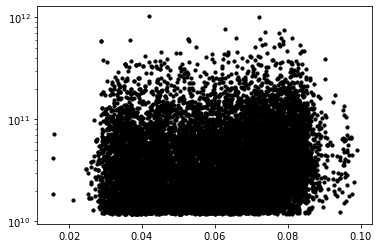

In [10]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

In [11]:
gal

Yang,objid,specobjid,distance,ra,dec,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score,row,redshift,M200,R200,R,Rn,vlos,vlosn,t_infall,infall,orbital,interloper,pinfall,porbital,pinterloper,SF
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,int64
2,1237665547827347728,2841891013398652928,66.9279962333088,240.988574304508,15.0749487080488,18.10222,16.55984,15.87389,15.51887,15.23896,0.03046442,0.00452454,0.003532456,0.003606966,0.00795144,0.046343,0.014991,0.03524532,1.029862e-05,0.5167674,1,10.31747,10.22748,10.41237,0.07491233,-0.09746825,0.2819673,-10.28968,-10.48632,-10.06143,6406905000.0,4934299000.0,7745638000.0,8277929000.0,6778579000.0,10976760000.0,0.8717796,5,0.036,15.29,2.01,2.875014705996323,1.430355575122549,-218.38549440486503,-0.10693324963996216,12872498809.452005,1,0,0,0.78,0.14,0.08,1
2,1237665566081483195,2838400888110868480,90.4464881468585,240.713424596535,14.6111162264233,17.71942,16.36608,15.73907,15.40933,15.13747,0.02493478,0.004048082,0.003419265,0.003449163,0.007783792,0.04369,0.012716,0.03736607,1.491802e-05,0.1406163,2,10.13713,10.05175,10.2355,-0.1388986,-0.4566603,0.1964595,-10.32625,-10.65404,-9.982267,2199423000.0,1791245000.0,4881733000.0,3430031000.0,2580399000.0,6528688000.0,0.9467953,7,0.036,15.29,2.01,3.885294617538927,1.9329823967855362,395.30645086878485,0.19356323784340831,9610293096.935078,1,0,0,0.87,0.0,0.13,1
2,1237665566081548691,2841874520724236288,91.5153203175785,240.861818228176,14.614028977464,18.32219,16.69393,15.93943,15.57824,15.30447,0.03610525,0.004809855,0.003709603,0.003675827,0.008213216,0.055527,0.017263,0.03548127,1.437615e-05,0.9202008,-1,10.11277,10.01669,10.20364,-1.265493,-2.603339,-0.6487934,-11.42083,-12.74024,-10.81532,7989685000.0,6855567000.0,8556743000.0,9227518000.0,7678189000.0,9877236000.0,0.9464893,10,0.036,15.29,2.01,3.9312082617835555,1.9558250058624655,-150.10747272040396,-0.07350066860886335,25607684883.972534,1,0,0,0.89,0.0,0.11,0
2,1237665566081548780,2841886065596327936,91.5903972370934,240.928683103086,14.6267166803865,19.25206,17.60691,16.83579,16.39132,16.06802,0.06919918,0.007885234,0.005715102,0.005366819,0.01269586,0.076563,0.017525,0.05630241,1.4803e-05,0.2478099,2,10.27325,10.17875,10.37284,-0.4257214,-0.9914829,-0.005090852,-10.74232,-11.34,-10.32256,7473351000.0,5508679000.0,8928664000.0,8527821000.0,6728601000.0,9377452000.0,0.9464893,11,0.036,15.29,2.01,3.934433328419853,1.9574295166267928,5875.009070679324,2.876719506046089,654817423.9337984,0,0,1,0.0,0.0,1.0,1
2,1237665566618091639,2838545748767827968,60.9659738031445,240.21455774713,15.1512635121507,16.31818,14.7857,14.24718,13.95108,13.74776,0.01020202,0.002220793,0.00211024,0.002107097,0.003646254,0.027943,0.008082,0.03396977,8.886583e-06,1.0,5,10.47317,10.36887,10.59703,-0.5868946,-1.980354,0.1084287,-11.13211,-12.48108,-10.409,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,1.0,13,0.036,15.29,2.01,2.6189051086844644,1.3029378650171466,-587.4977239433766,-0.28767039197612176,4358731855.843237,1,0,1,0.66,0.13,0.21,1
2,1237665566618419260,2841891563154466816,73.802168608806,240.970254216315,14.9464390274363,16.8343,15.07076,14.2641,13.86823,13.54384,0.01724369,0.002493925,0.002136988,0.002104899,0.003694906,0.033084,0.008575,0.03612468,9.095759e-06,0.9763039,5,10.87844,10.78511,10.96169,-1.250776,-2.561647,-0.4356033,-12.16615,-13.53977,-11.3569,17329540000.0,12568260000.0,19606680000.0,6028904000.0,3829858000.0,6978492000.0,0.9748663,23,0.036,15.2

# Dynamical Classes
---------------------------------------


In [12]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['sfr'])
ssfr = np.array(gal['ssfr'])
age  = np.log10(np.array(gal['age_fire']))

rn   = np.array(gal['Rn'])
vn   = np.array(gal['vlosn'])

sf   = np.array(gal['SF'])

Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

<ipython-input-12-2fddd53004a6>:4: RuntimeWarning: invalid value encountered in log10
  age  = np.log10(np.array(gal['age_fire']))


In [26]:
t_infall = np.array(gal['t_infall'])/1e9 ## km/s/Mpc

# Quenching Fraction
---------------------------------------

The Quenched Fraction Excess is defined as:
$$
 QFE_{2-1} = \frac{f_{q,1}-f{q,2}}{1-f_{q,1}} \;,
$$
where $f_{q,1}, f_{q,2}$ is the quiescent fraction in a stellar mass bin in
environment 1 and 2, respectively. A QFE of zero implies there is
no excess of quenched galaxies in one environment compared to the
other. A high QFE means that many of the star-forming galaxies
observed in environment 1 must be quenched in environment 2.
In the extreme case of QFE = 1, all of the galaxies that are starforming 
in environment 1 would be quenched were they to reside in environment 2.
<br> see:https://arxiv.org/pdf/2111.14624.pdf

In [27]:
def compute_fraction(prob,eps=1e-6):
    N1, N2 = np.sum(prob), prob.size
    frac = N1/N2
    frac_err = frac*np.sqrt(1/(N1+eps)+1/(N2+eps))
    return np.array([frac,frac_err])

def quenching_fraction_excess(fq1,fq2):
    dfrac = fq2[0]-fq1[0]
    qfe = dfrac/(1-fq1[0])
    qfe_err = qfe*np.sqrt((np.sqrt(fq2[1]**2+fq1[1]**2)/dfrac)**2 + (fq1[1]/(1-fq1[0]))**2)
    return np.array([qfe,qfe_err])

In [28]:
def make_bins(x,xbins):
    indices = []
    xmd     = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],xbins[1:]):
        w, = np.where((x<=xh)&(x>xl))
        indices.append(w)
    return indices,xmd

In [35]:
# time bins
abins = np.linspace(8.2,10.15,11) #age
abins = np.nanpercentile(age,np.linspace(0,100,11))

# tbins = np.linspace(8.2,11.,11)   #infall time
tbins = np.logspace(8.2,11.2,11)/1e9/2.   #infall time
# tbins = np.percentile(t_infall,np.linspace(0,100,11))

# velocity
vbins = np.linspace(-2.6,2.6,16)
# vbins = np.percentile(vn,np.linspace(0,100,16))

# keys
akeys, amed = make_bins(age,abins)
tkeys, tmed = make_bins(t_infall,tbins)
vkeys, vmed = make_bins(vn,vbins)

In [36]:
## Quenching Fraction
## i: infall, o: orbital, n: interlopers

rmask = rn<=1.
hmass_mask = (mass>11.)

qf_o_tinfall = np.array([compute_fraction(Po[idx][rmask[idx]]*(1-sf[idx][rmask[idx]])) for idx in tkeys]).T
qf_i_tinfall = np.array([compute_fraction(Pi[idx]*(1-sf[idx])) for idx in tkeys]).T
qf_n_tinfall = np.array([compute_fraction(Pn[idx]*(1-sf[idx])) for idx in tkeys]).T

qf_o_vn = np.array([compute_fraction(Po[idx][rmask[idx]]*(1-sf[idx][rmask[idx]])) for idx in vkeys]).T
qf_i_vn = np.array([compute_fraction(Pi[idx]*(1-sf[idx])) for idx in vkeys]).T
qf_n_vn = np.array([compute_fraction(Pn[idx]*(1-sf[idx])) for idx in vkeys]).T


In [37]:
## Quenching Fraction Excess
qfe_tinfall1 = quenching_fraction_excess(qf_i_tinfall,qf_o_tinfall)
qfe_tinfall2 = quenching_fraction_excess(qf_n_tinfall,qf_o_tinfall)
qfe_tinfall3 = quenching_fraction_excess(qf_n_tinfall,qf_i_tinfall)

qfe_vn1 = quenching_fraction_excess(qf_i_vn,qf_o_vn)
qfe_vn2 = quenching_fraction_excess(qf_n_vn,qf_o_vn)
qfe_vn3 = quenching_fraction_excess(qf_n_vn,qf_i_vn)


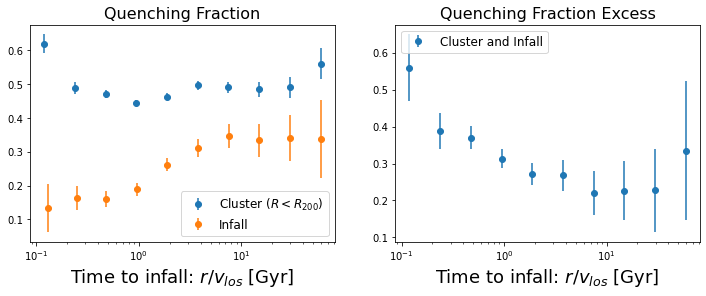

In [48]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.errorbar(tmed,qf_o_tinfall[0],yerr=qf_i_tinfall[1],label='Cluster ($R<R_{200}$)',fmt='o')
plt.errorbar(tmed+0.010,qf_i_tinfall[0],yerr=qf_o_tinfall[1],label='Infall',fmt='o')
# plt.errorbar(tmed+0.020,qf_n_tinfall[0],yerr=qf_n_tinfall[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12)
plt.xlabel(r'Time to infall: $r/v_{los}$ [Gyr]',fontsize=18)
plt.title('Quenching Fraction',fontsize=16)
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.errorbar(tmed,qfe_tinfall1[0],yerr=qfe_tinfall1[1],label='Cluster and Infall',fmt='o')
# plt.errorbar(tmed+0.010,qfe_tinfall2[0],yerr=qfe_tinfall2[1],label='Cluster and Interlopers',fmt='o')
# plt.errorbar(tmed+0.020,qfe_tinfall3[0],yerr=qfe_tinfall3[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'Time to infall: $r/v_{los}$ [Gyr]',fontsize=18)
plt.title('Quenching Fraction Excess',fontsize=16)
plt.xscale('log')

# plt.ylim(-0.02,1.05)

Text(0.5, 1.0, 'Infall Galaxies')

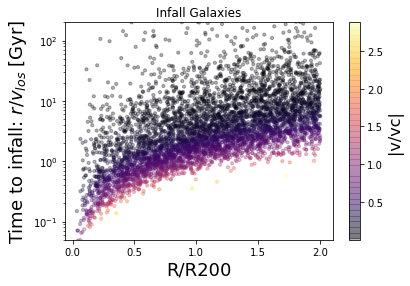

In [63]:
infall = np.array(gal['infall']).astype(bool)
plt.scatter(rn[infall],t_infall[infall],c=np.abs(vn)[infall],s=10,alpha=0.3,cmap='inferno')
plt.ylim(0.05,200.)
plt.yscale('log')
plt.ylabel(r'Time to infall: $r/v_{los}$ [Gyr]',fontsize=18)
plt.xlabel(r'R/R200',fontsize=18)
plt.colorbar().set_label('|v/vc|',fontsize=16)
plt.title('Infall Galaxies')

In [33]:
### Think more about halo mass
## To Do: quenching fraction per cluster; fit using kllr

Text(0.5, 1.0, 'Quenching Fraction Excess')

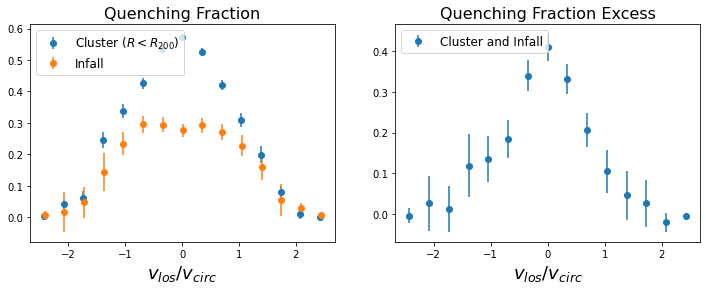

In [34]:
fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.errorbar(vmed,qf_o_vn[0],yerr=qf_i_vn[1],label='Cluster ($R<R_{200}$)',fmt='o')
plt.errorbar(vmed+0.010,qf_i_vn[0],yerr=qf_o_vn[1],label='Infall',fmt='o')
# plt.errorbar(vmed+0.020,qf_n_vn[0],yerr=qf_n_vn[1],label='Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'$v_{los}/v_{circ}$',fontsize=18)
plt.title('Quenching Fraction',fontsize=16)
# plt.ylim(-0.02,1.05)

plt.subplot(1, 2, 2)
plt.errorbar(vmed,qfe_vn1[0],yerr=qfe_vn1[1],label='Cluster and Infall',fmt='o')
# plt.errorbar(vmed+0.010,qfe_vn2[0],yerr=qfe_vn2[1],label='Cluster and Interlopers',fmt='o')
# plt.errorbar(vmed+0.020,qfe_vn3[0],yerr=qfe_vn3[1],label='Infall and Interlopers',fmt='o')
plt.legend(fontsize=12,loc=2)
plt.xlabel(r'$v_{los}/v_{circ}$',fontsize=18)
plt.title('Quenching Fraction Excess',fontsize=16)

# plt.ylim(-0.02,1.05)